# McDonald's Card Data Analysis - v1
## March 2018
### Dr Jose M Albornoz

# Import necessary modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

import numpy as np


RANDOM_STATE = 19

/Users/jmalbornoz/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jmalbornoz/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/jmalbornoz/anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

# 1 Load data

In [2]:
df_p1 = pd.read_csv('McD_Card_Data/CT_201709_p1.csv', sep=';', header=None)

In [7]:
df_p2 = pd.read_csv('McD_Card_Data/CT_201709_p2.csv', sep=';', header=None)

In [8]:
df_p3 = pd.read_csv('McD_Card_Data/CT_201709_p3.csv', sep=';', header=None)

In [9]:
df_p1.shape

(9962423, 8)

In [10]:
df_p2.shape

(6781156, 8)

In [11]:
df_p3.shape

(10339810, 8)

# 2 Concatenate data

In [16]:
df_list = [df_p1, df_p2, df_p3]

In [17]:
data = pd.concat(df_list)

In [18]:
data.columns = ['store_number', 'terminal_number', 'transaction_date', 'transaction_time', 'transaction_amount', 
               'card_scheme', 'pan_token', 'token_col']

In [19]:
data.shape

(27083389, 8)

In [25]:
data.drop('token_col', axis=1, inplace=True)

In [23]:
del df_p1

In [26]:
del df_p2

In [27]:
del df_p3

In [28]:
data.head()

,store_number,terminal_number,transaction_date,transaction_time,transaction_amount,card_scheme,pan_token
0,262,3,2017/09/01,0,437,S,D08D751E07A1775D5E4923655B97F6270FE414B7B554E9...
1,262,24,2017/09/01,2,319,S,D943C4129260645C5C886E66FFE781692638F1D772CBB0...
2,262,23,2017/09/01,3,396,S,0F07B1D413871FD689B63BAEC6D6857DF2D1B8792389C8...
3,262,22,2017/09/01,3,579,S,528D75D2EE6F7232976DD5CBE8227EB1DAADB3A14CAAF0...
4,262,21,2017/09/01,3,99,S,E9216F9D775D8540D08435890ED5DA507122124FD3E0B8...


In [29]:
data.tail()

,store_number,terminal_number,transaction_date,transaction_time,transaction_amount,card_scheme,pan_token
10339805,626,24,2017/09/27,2314,268,S,4818192528269612160
10339806,626,20,2017/09/27,2308,238,S,5570983305652013048
10339807,626,20,2017/09/27,2303,1358,S,4751285135047754650
10339808,626,20,2017/09/27,2258,637,S,4658589030055420015
10339809,626,20,2017/09/27,2256,447,S,4821779394724681416


# 3 Preliminary Analysis

## 3.1 Number of stores

In [32]:
len(data['store_number'].unique())

1275

## 3.2 Number of cards

In [33]:
len(data['pan_token'].unique())

13309332

## 3.3 Transaction times histogram

([<matplotlib.axis.XTick at 0x1252b6990>,
 <a list of 23 Text xticklabel objects>)

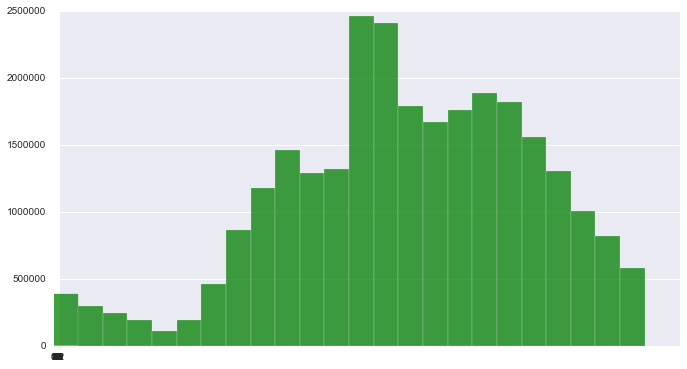

In [42]:
plt.figure(figsize=(10,6), dpi=80)
n, bins, patches = plt.hist(data['transaction_time'], 24, facecolor='green', alpha=0.750)
plt.xticks(np.arange(2300/100))